In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# for solve problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# for filter warnings
import warnings
warnings.filterwarnings('ignore')
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.base import clone 
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, jaccard_score, log_loss
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, StratifiedKFold

In [102]:
# Read Dataset
df = pd.read_excel("C:/Users/jingy/Desktop/SEM 4/INT6006 Machine Learning and Related Applications/Assignment/Bank_Personal_Loan_Modelling.xlsx", sheet_name="Data")

FONT = {'fontsize':16, 'fontstyle':'normal', 'fontfamily':'Times New Roman', 'backgroundcolor':'#aed6f1', 'color':'black'} 

In [103]:
# Analyzing Data
#Display number of observations(rows) and features(columns) in the dataset
print("Number of observations and features for loan dataset:\n", df.shape) 

Number of observations and features for loan dataset:
 (5000, 14)


In [104]:
# Display top 5 observations of the dataset
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49   91107.0       4    1.6        1.0         0   
1   2   45          19      34   90089.0       3    1.5        1.0         0   
2   3   39          15      11   94720.0       1    1.0        1.0         0   
3   4   35           9     100   94112.0       1    2.7        2.0         0   
4   5   35           8      45   91330.0       4    1.0        2.0         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                 1.0         0.0     0.0           0  
1              0                 1.0         0.0     0.0           0  
2              0                 0.0         0.0     0.0           0  
3              0                 0.0         0.0     0.0           0  
4              0                 0.0         0.0     0.0           1

In [105]:
# Display last 5 observations of the dataset
df.tail()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
4995  4996   29           3      40   92697.0       1    1.9        3.0   
4996  4997   30           4      15   92037.0       4    0.4        1.0   
4997  4998   63          39      24   93023.0       2    0.3        3.0   
4998  4999   65          40      49   90034.0       3    0.5        2.0   
4999  5000   28           4      83   92612.0       3    0.8        1.0   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
4995         0              0                 0.0         0.0     1.0   
4996        85              0                 0.0         0.0     1.0   
4997         0              0                 0.0         0.0     0.0   
4998         0              0                 0.0         0.0     1.0   
4999         0              0                 0.0         0.0     1.0   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [106]:
# Unique value in dataset
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [107]:
# Understand the data type and information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            4995 non-null   float64
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           4997 non-null   float64
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  4998 non-null   float64
 11  CD Account          4999 non-null   float64
 12  Online              4999 non-null   float64
 13  CreditCard          5000 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 547.0 KB


In [108]:
# Data cleaning
# Check for missing values
print("Missing values of loan dataset:\n", df.isnull().sum(),"\n")

Missing values of loan dataset:
 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              5
Family                0
CCAvg                 0
Education             3
Mortgage              0
Personal Loan         0
Securities Account    2
CD Account            1
Online                1
CreditCard            0
dtype: int64 



In [109]:
# Dropping rows with missing values because only few rows is missing
df = df.dropna(subset=['ZIP Code', 'Education', 'Securities Account', 'CD Account', 'Online'])

# Convert the float type to int type
df['ZIP Code'] = df['ZIP Code'].astype('int64')
df['Education'] = df['Education'].astype('int64')
df['Securities Account'] = df['Securities Account'].astype('int64')
df['CD Account'] = df['CD Account'].astype('int64')
df['Online'] = df['Online'].astype('int64')

In [110]:
# Verify the missing values have been handled
print("Missing values of loan dataset:\n", df.isnull().sum(),"\n")

# Verufy the data type has been converted
df.info()

Missing values of loan dataset:
 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
Index: 4989 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4989 non-null   int64  
 1   Age                 4989 non-null   int64  
 2   Experience          4989 non-null   int64  
 3   Income              4989 non-null   int64  
 4   ZIP Code            4989 non-null   int64  
 5   Family              4989 non-null   int64  
 6   CCAvg               4989 non-null   float64
 7   Education           4989 non-null   int64  
 8   Mortgage           

In [111]:
# Data reduction
# Remove irrelevant feature
df.drop('ID', axis=1, inplace=True) 
df.drop('ZIP Code', axis=1, inplace=True) 

In [112]:
# Check whether the features have been dropped
print("Dataset after data reduction: \n")
df.info()

Dataset after data reduction: 

<class 'pandas.core.frame.DataFrame'>
Index: 4989 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4989 non-null   int64  
 1   Experience          4989 non-null   int64  
 2   Income              4989 non-null   int64  
 3   Family              4989 non-null   int64  
 4   CCAvg               4989 non-null   float64
 5   Education           4989 non-null   int64  
 6   Mortgage            4989 non-null   int64  
 7   Personal Loan       4989 non-null   int64  
 8   Securities Account  4989 non-null   int64  
 9   CD Account          4989 non-null   int64  
 10  Online              4989 non-null   int64  
 11  CreditCard          4989 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 506.7 KB


In [113]:
# Noise data handling
# Check if each feature contains negative values
pd.set_option('display.max_rows', 20) # for show all rows
round(df.describe().T, 2)

count   mean     std   min   25%   50%    75%    max
Age                 4989.0  45.34   11.46  23.0  35.0  45.0   55.0   67.0
Experience          4989.0  20.11   11.46  -3.0  10.0  20.0   30.0   43.0
Income              4989.0  73.62   45.93   8.0  39.0  64.0   98.0  224.0
Family              4989.0   2.40    1.15   1.0   1.0   2.0    3.0    4.0
CCAvg               4989.0   1.94    1.75   0.0   0.7   1.5    2.5   10.0
Education           4989.0   1.88    0.84   1.0   1.0   2.0    3.0    3.0
Mortgage            4989.0  56.32  101.31   0.0   0.0   0.0  101.0  635.0
Personal Loan       4989.0   0.09    0.29   0.0   0.0   0.0    0.0    1.0
Securities Account  4989.0   0.10    0.31   0.0   0.0   0.0    0.0    1.0
CD Account          4989.0   0.06    0.24   0.0   0.0   0.0    0.0    1.0
Online              4989.0   0.60    0.49   0.0   0.0   1.0    1.0    1.0
CreditCard          4989.0   0.29    0.46   0.0   0.0   0.0    1.0    1.0

In [114]:
# Handle the negative value in experience
# Display count of negative value
df[df['Experience']<0]['Experience'].value_counts()

Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64

In [115]:
# Convert negative value to positive value
df['Experience'] = df['Experience'].apply(abs)

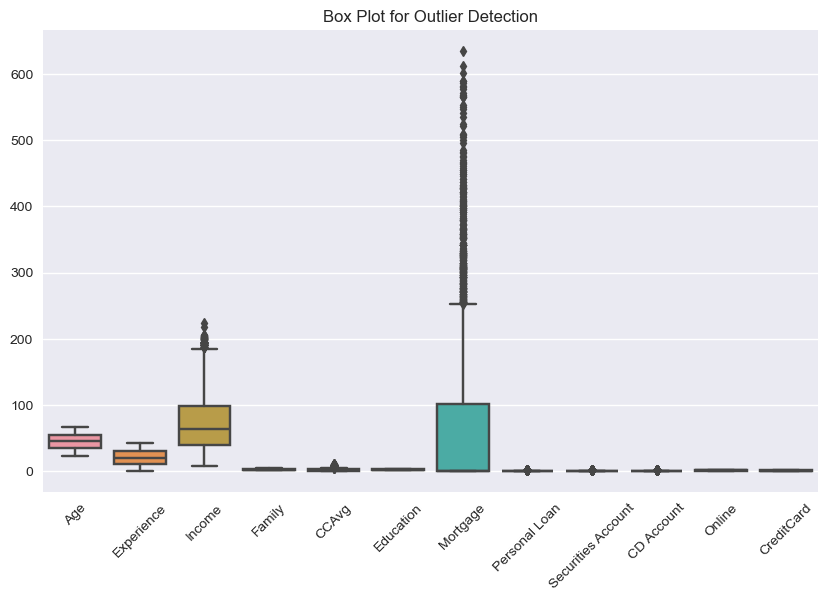

In [116]:
# Check whether outlier data exist in the feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Box Plot for Outlier Detection')
plt.show()

In [117]:
# Handle outliers in Mortgage
df[stats.zscore(df['Mortgage'])>3]['Mortgage'].count()

105

In [118]:
# 105 records as outliers and filter out these records from the dataset
outlier_indexes = df[stats.zscore(df['Mortgage'])>3].index
df.drop(outlier_indexes, inplace=True)
df.reset_index(drop=True, inplace=True)

# Why define the threshold as 3?
# In a standard normal distribution, approximately 99.7% of data points lie within three standard deviations from the mean 
# (i.e., between -3 and +3 standard deviations). Therefore, values beyond 3 standard deviations are considered statistically 
# rare and may be flagged as outliers.

In [119]:
# check invalid valuse
for col in df:
    print(f"{col} has {df[col].nunique()} unique value")

Age has 45 unique value
Experience has 44 unique value
Income has 162 unique value
Family has 4 unique value
CCAvg has 107 unique value
Education has 3 unique value
Mortgage has 265 unique value
Personal Loan has 2 unique value
Securities Account has 2 unique value
CD Account has 2 unique value
Online has 2 unique value
CreditCard has 2 unique value


In [120]:
# Check value counts of column that appear categorical accoring to above results
discrete_cols1 = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for col in discrete_cols1:
    print(f"{df[col].value_counts()}")
    print('-' * 50)

# According to the results and type of columns, conclude that there are no invalid values.

Family
1    1438
2    1251
4    1206
3     989
Name: count, dtype: int64
--------------------------------------------------
Education
1    2028
3    1474
2    1382
Name: count, dtype: int64
--------------------------------------------------
Personal Loan
0    4461
1     423
Name: count, dtype: int64
--------------------------------------------------
Securities Account
0    4375
1     509
Name: count, dtype: int64
--------------------------------------------------
CD Account
0    4605
1     279
Name: count, dtype: int64
--------------------------------------------------
Online
1    2914
0    1970
Name: count, dtype: int64
--------------------------------------------------
CreditCard
0    3446
1    1438
Name: count, dtype: int64
--------------------------------------------------


In [121]:
# Duplicate data

# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Display duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Number of duplicate rows: 13
      Age  Experience  Income  Family     CCAvg  Education  Mortgage  \
778    29           3      39       4  2.100000          3         0   
997    28           4      43       3  0.100000          2         0   
1484   36          10      80       4  2.200000          2         0   
1978   60          35      80       3  0.500000          1         0   
2735   53          27      59       2  0.800000          3         0   
2969   50          25      58       1  1.300000          2         0   
3366   29           3      31       4  0.300000          2         0   
3598   38           8      21       1  0.666667          3         0   
3955   39          15      65       1  1.500000          3         0   
4374   40          14      28       2  0.800000          3         0   
4506   66          41     114       1  0.800000          3         0   
4631   44          20      72       3  0.300000          3         0   
4633   31           7      18      

In [122]:
# Remove duplicate rows
df = df.drop_duplicates()

# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [123]:
# Feature Transformation
# In the dataset, CCAVG represents average monthly credit card spending, but Income represents the amount of annual income. 
# To make the units of the features equal, cnvert average monthly credit card spending to annual:
df['CCAvg'] = df['CCAvg']*12

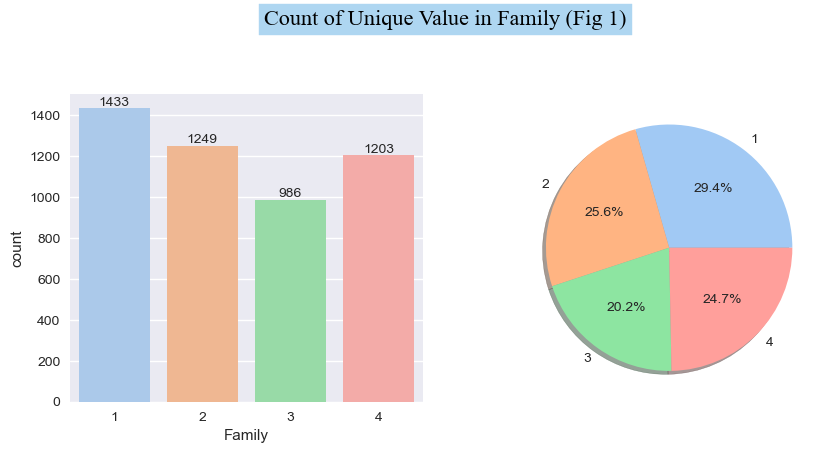

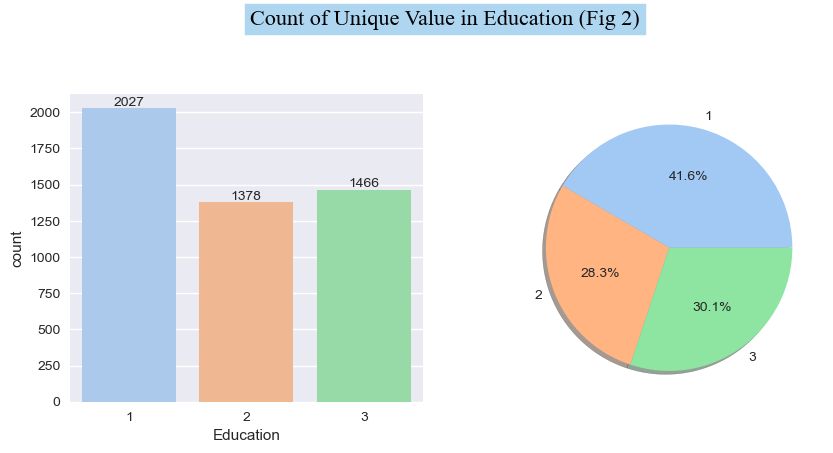

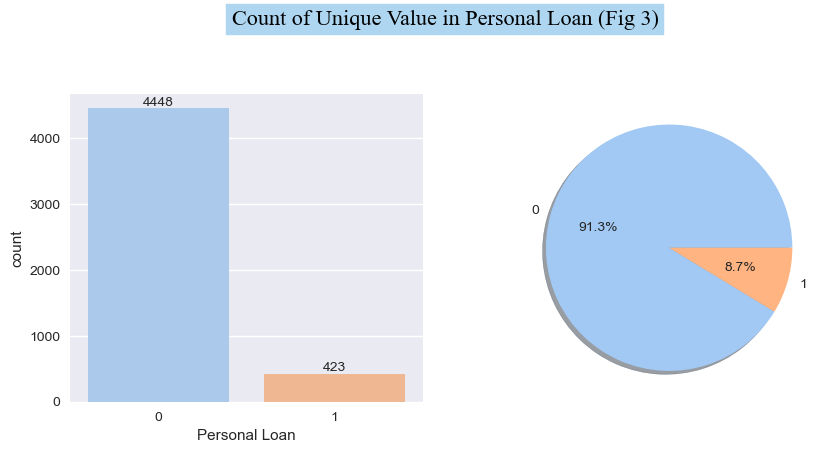

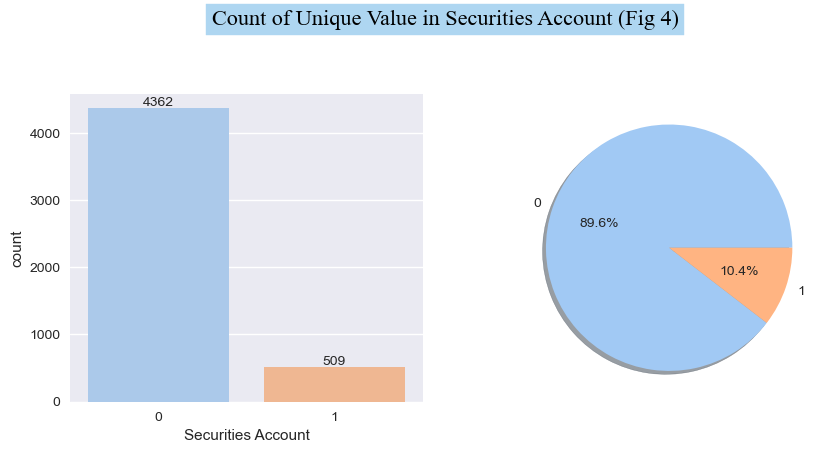

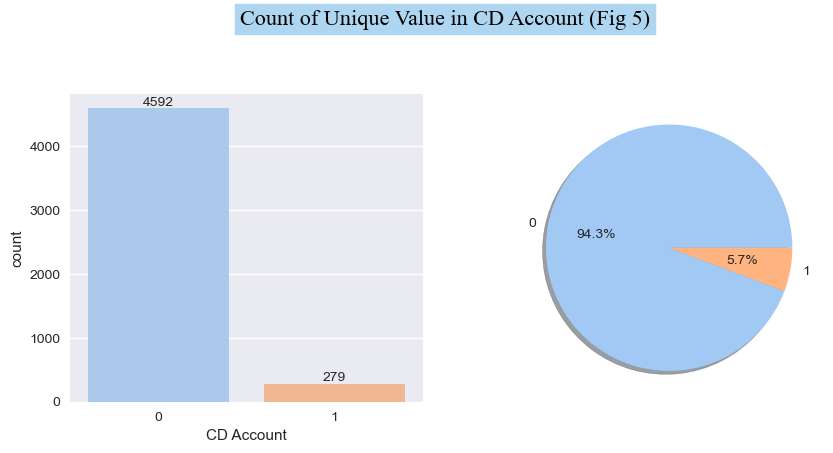

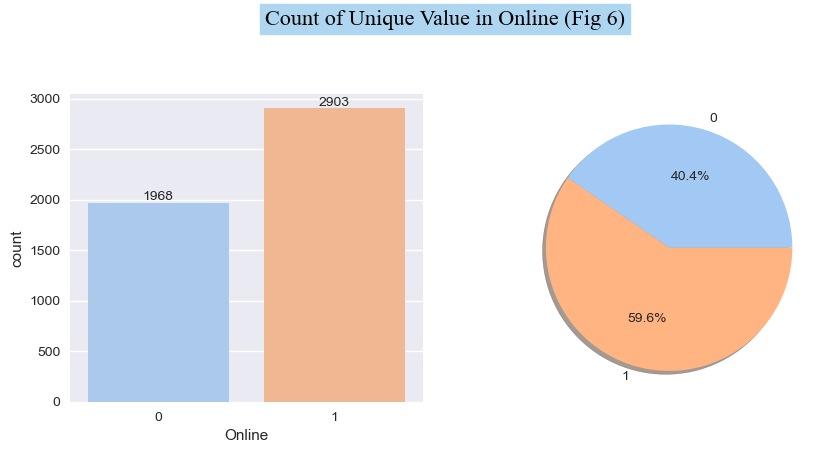

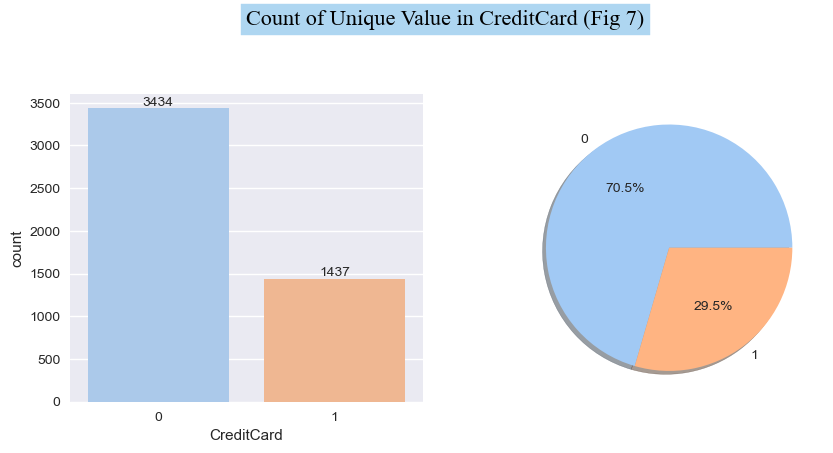

In [124]:
# univariate analysis of categorical data:
sns.set_palette("pastel")
for i, col in enumerate(discrete_cols1):

    fig, axes = plt.subplots(1,2,figsize=(10,4))

    # count of col (countplot)
    sns.countplot(data=df, x=col, ax=axes[0])
    for container in axes[0].containers:
        axes[0].bar_label(container)
    # count of col (pie chart)
    slices = df[col].value_counts().sort_index().values
    activities = [var for var in df[col].value_counts().sort_index().index]
    axes[1].pie(slices, labels=activities, shadow=True, autopct='%1.1f%%')

    plt.suptitle(f'Count of Unique Value in {col} (Fig {i+1})', y=1.09, **FONT)
    plt.show()

In [125]:
# univariate analysis of numerical data:
df.loc[:, ~df.columns.isin(discrete_cols1)].describe().T

count       mean        std   min   25%   50%   75%    max
Age         4871.0  45.357627  11.454517  23.0  35.0  45.0  55.0   67.0
Experience  4871.0  20.152741  11.405233   0.0  10.0  20.0  30.0   43.0
Income      4871.0  71.912338  44.662636   8.0  38.0  62.0  93.0  224.0
CCAvg       4871.0  22.804804  20.520610   0.0   8.4  18.0  30.0  120.0
Mortgage    4871.0  47.993636  83.634156   0.0   0.0   0.0  94.0  360.0

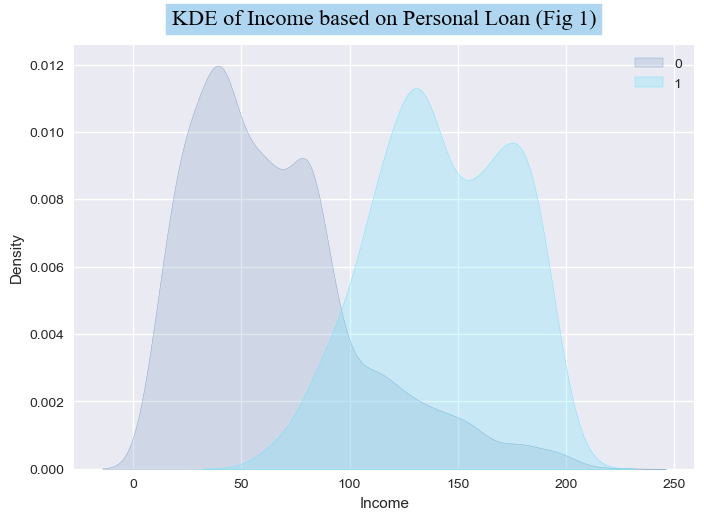

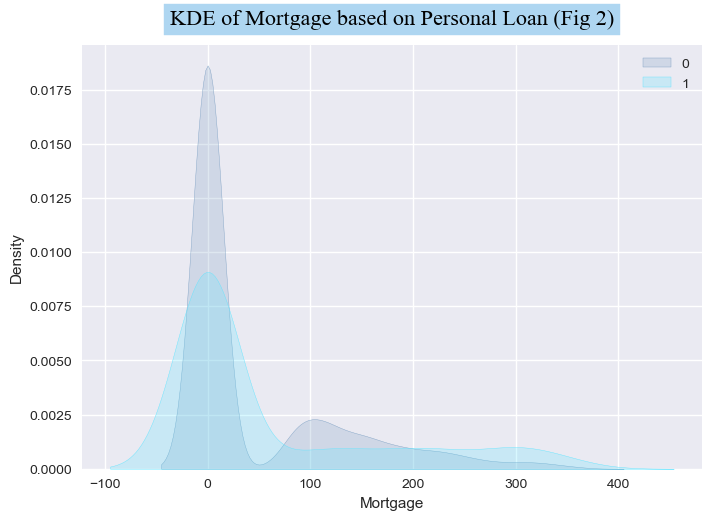

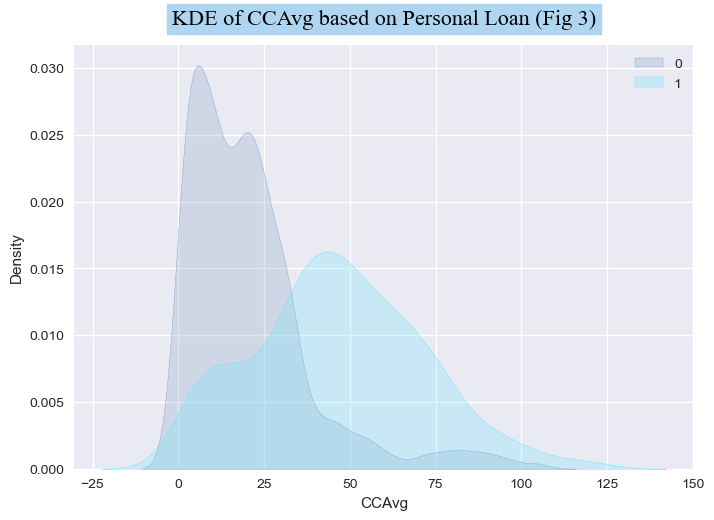

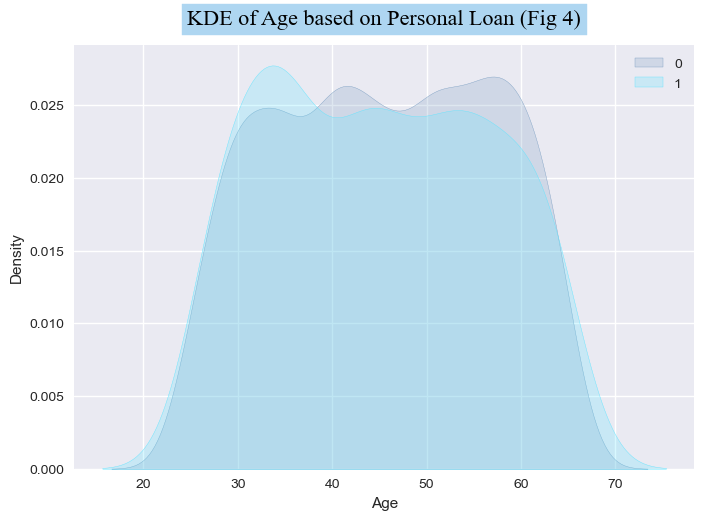

In [126]:
# check distribution of Income (based on Personal Loan)
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.set_palette(['#7fa1c4','#64e5ff'])
for j, col in enumerate(['Income','Mortgage','CCAvg','Age']):
    for i, label in enumerate(df['Personal Loan'].unique().tolist()):
        sns.kdeplot(df.loc[df['Personal Loan'] == label, col], label=label, shade=True)
    plt.title(f'KDE of {col} based on Personal Loan (Fig {j+1})', fontdict=FONT, pad=15)
    plt.legend()
    plt.show()

In [127]:
# According to above plots:

# The Income of people who have accepted a bank loan is often higher than that of people who have not accepted a bank loan. 
# ..Approximately, people whose monthly Income is more than 8 thousand dollars have accepted a bank loan (Fig 1)
# Most people who accepted a bank loan had mortgage euqal to zero (Fig 2).
# The CCAvg of people who have accepted a bank loan is often higher than that of people who have not accepted a bank loan. 
# ..Approximately, people whose CCAvg is more than 3 thousand dollars have accepted a bank loan (Fig 3).
# It seems that age does not have much influence in determining whether or not to accept a bank loan (Fig 4)

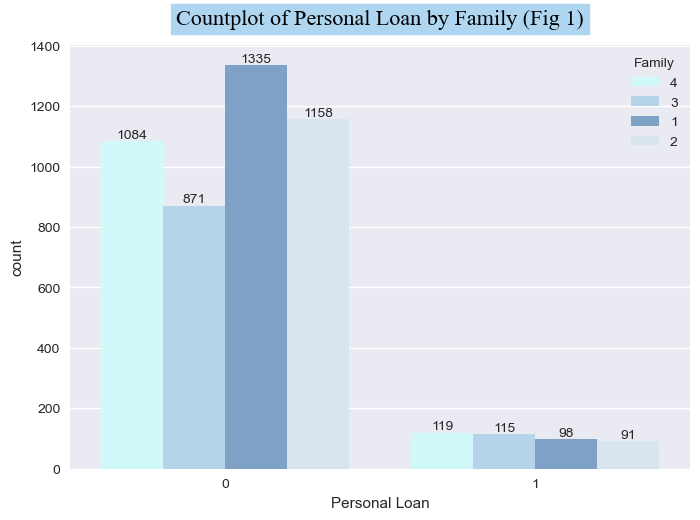

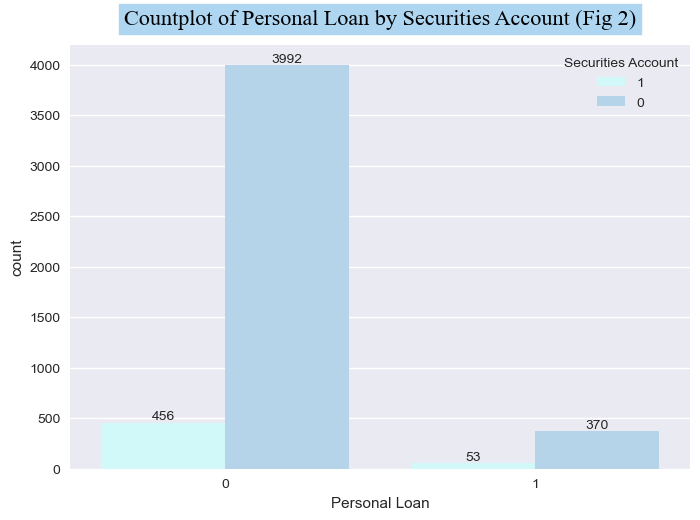

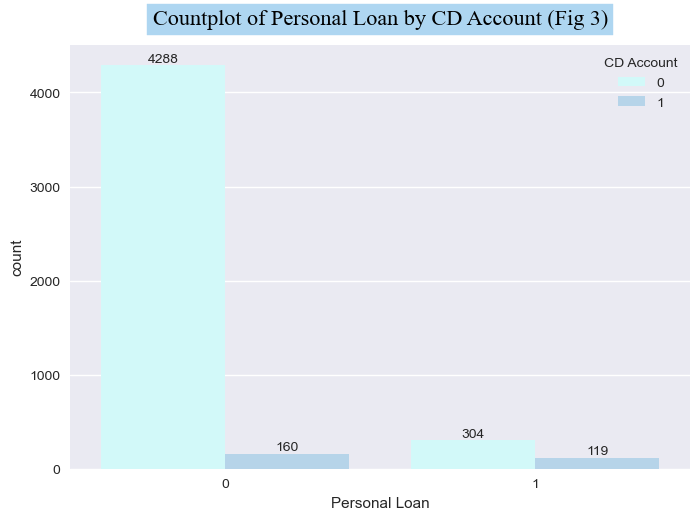

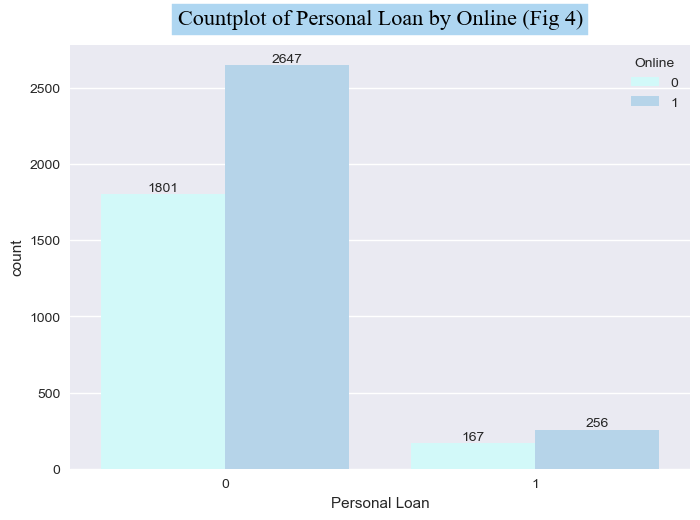

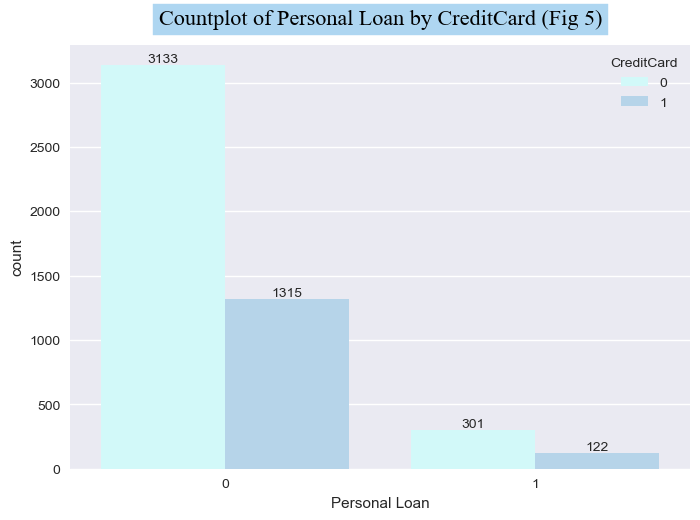

In [128]:
# count of purchased based on Gender
%matplotlib inline
sns.set_palette(['#CCFFFF','#aed6f1','#73a1d1','#d4e6f1'])
discrete_cols2 = ['Family', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

for i, col in enumerate(discrete_cols2):
    if col in df.columns:
        # Convert hue column to string to prevent legend errors
        df[col] = df[col].astype(str)
        
        ax = sns.countplot(data=df, x='Personal Loan', hue=col)

        for container in ax.containers:
            ax.bar_label(container)

        plt.title(f'Countplot of Personal Loan by {col} (Fig {i + 1})', fontdict=FONT, pad=15)
        plt.show()
    else:
        print(f"Column {col} does not exist in the DataFrame.")

============================== Mean of Income in each categorical feature ==============================


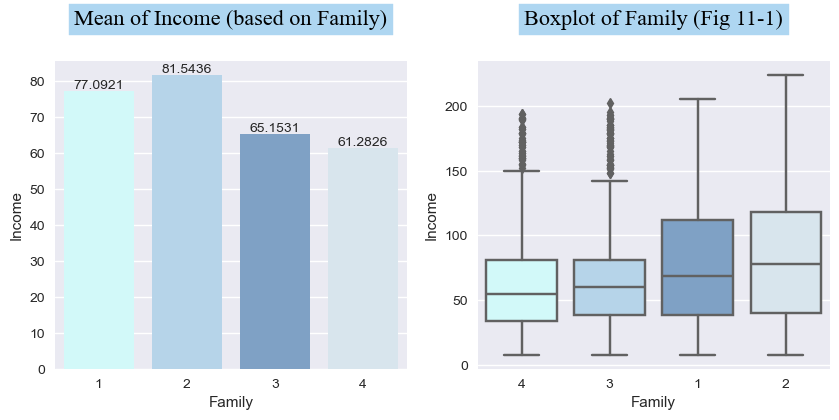

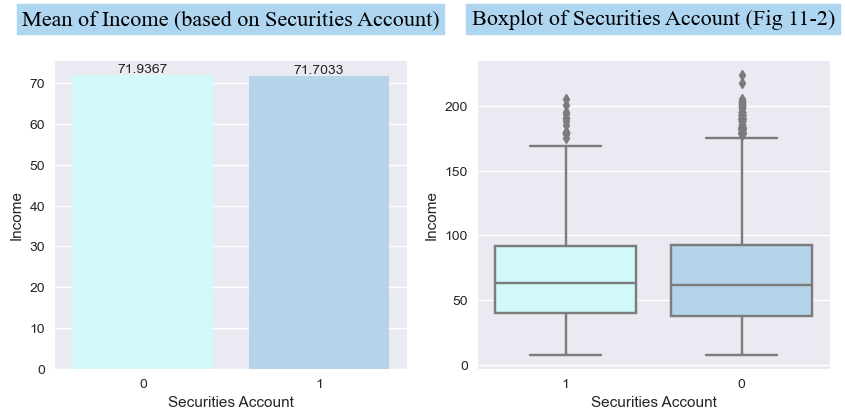

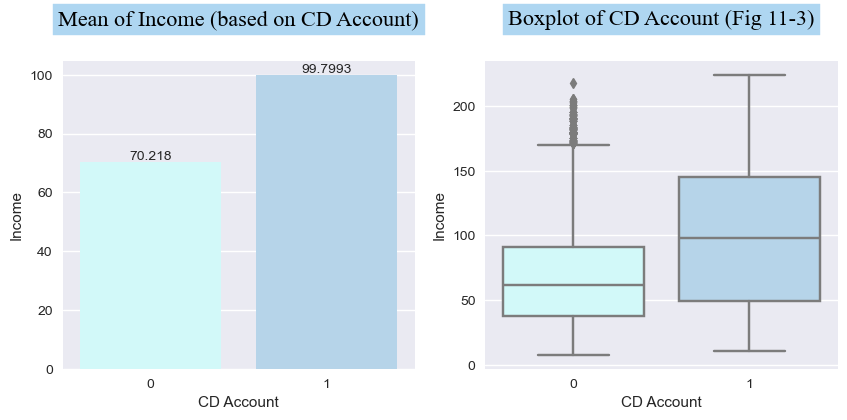

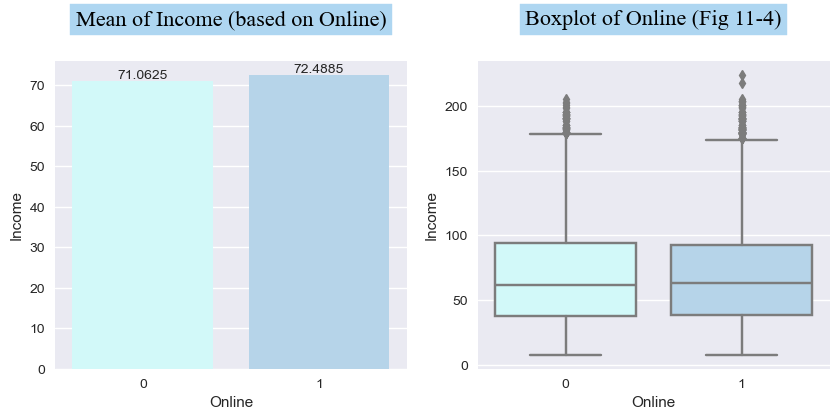

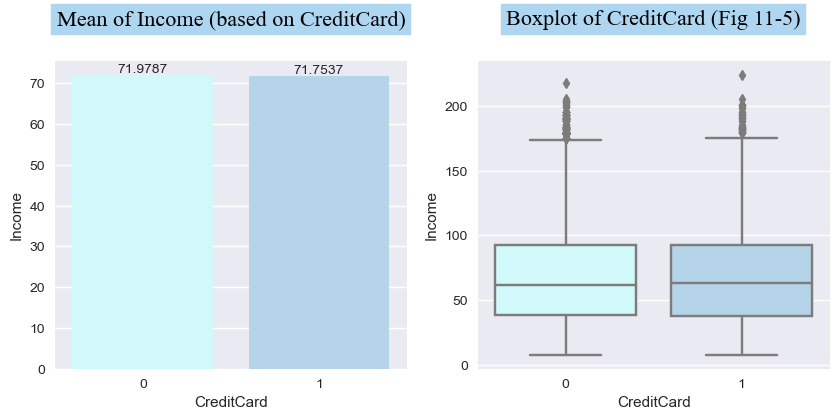

============================== Mean of CCAvg in each categorical feature ==============================


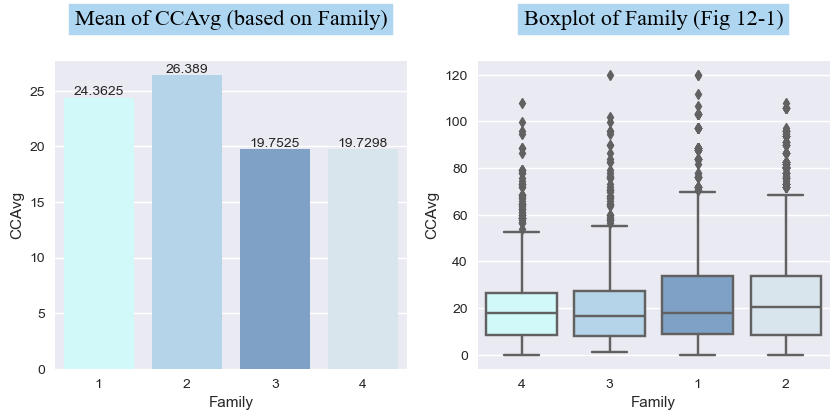

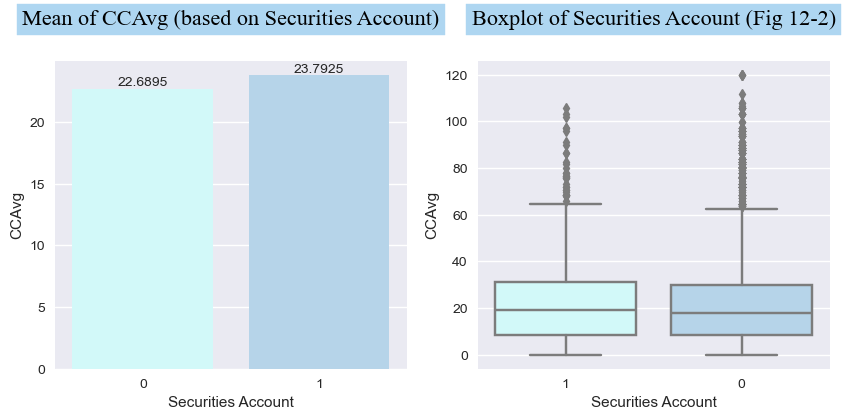

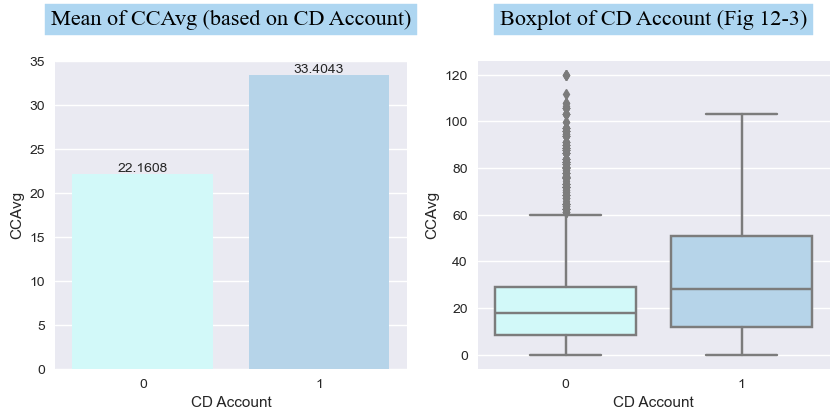

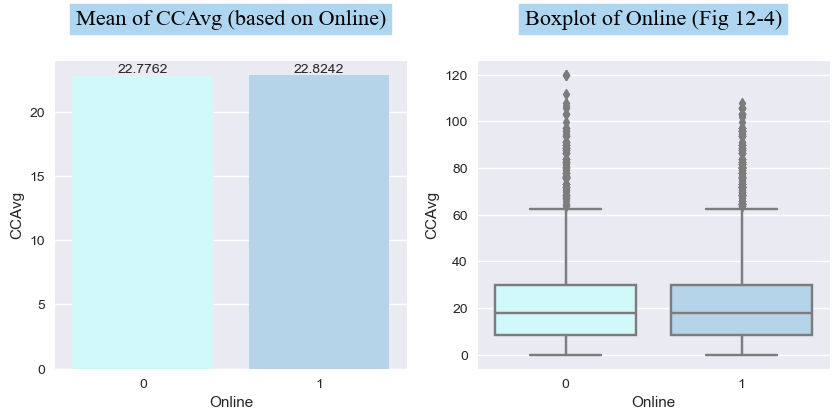

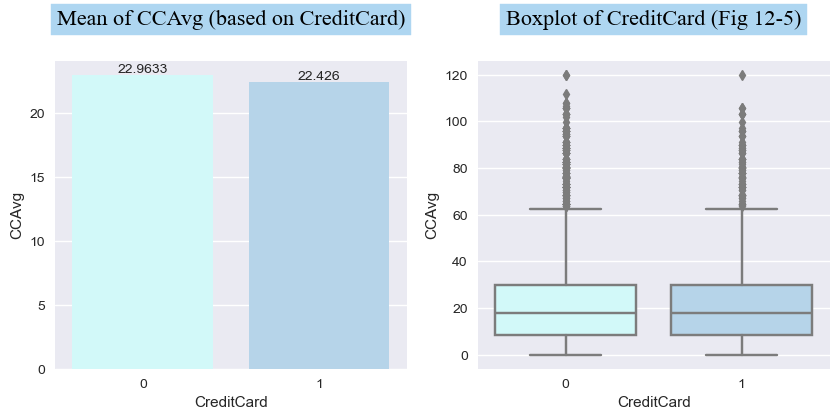

============================== Mean of Mortgage in each categorical feature ==============================


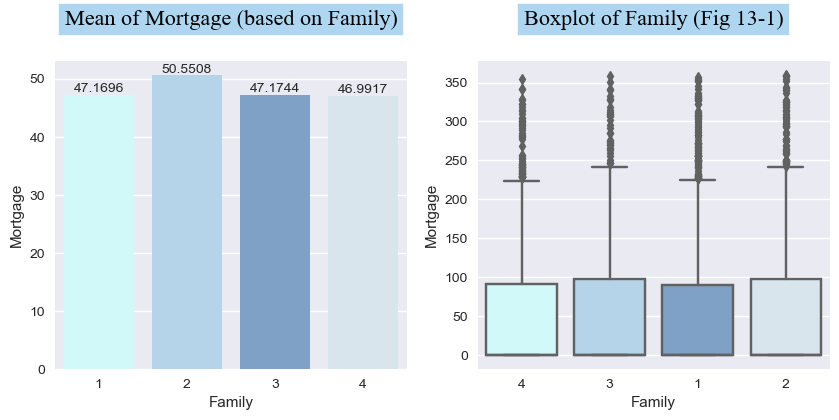

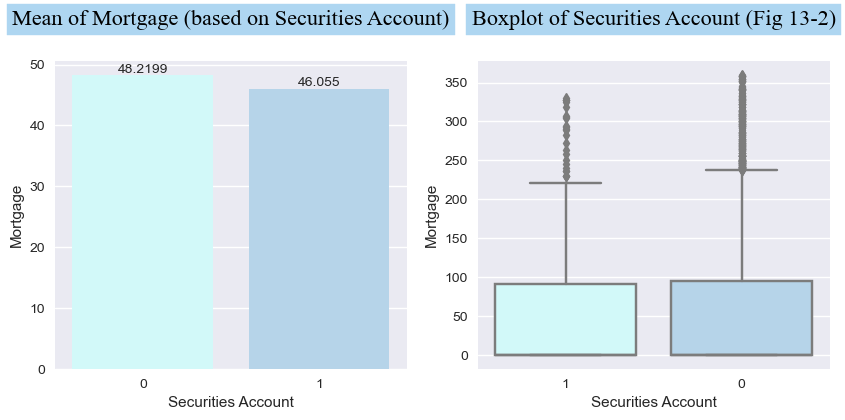

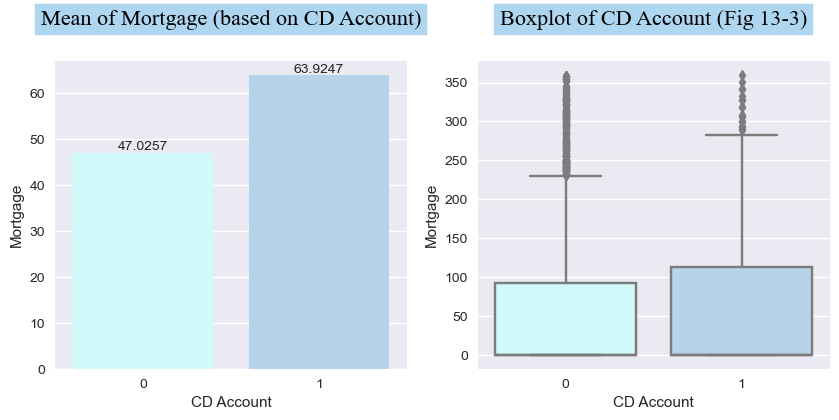

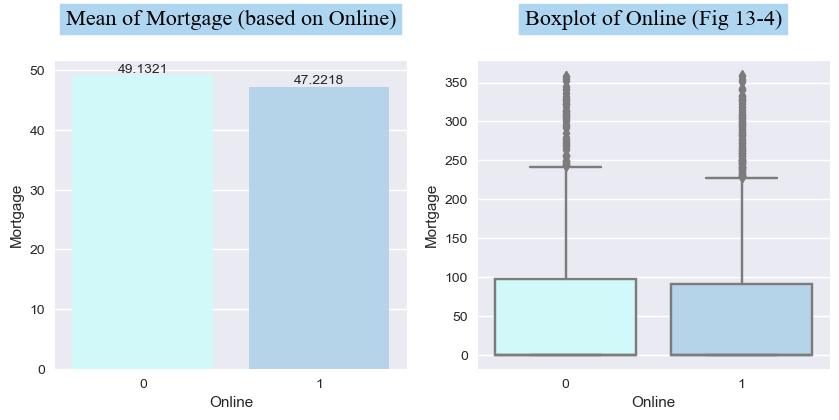

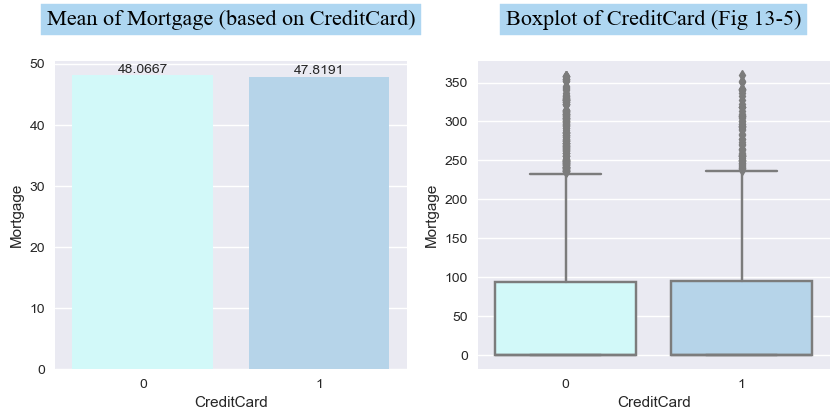

In [129]:
# Mean of Income and CCAvg based on each feature
for i, col in enumerate(['Income', 'CCAvg','Mortgage']):
    print('='*30, f"Mean of {col} in each categorical feature", '='*30)
    for j, cat in enumerate(discrete_cols2):
        fig , ax= plt.subplots(1,2, figsize=(10,4))
        gp = df.groupby([cat])[col].mean().to_frame().reset_index()
        sns.barplot(data=gp, x=cat, y=col, ax=ax[0])
        for container in ax[0].containers:
            ax[0].bar_label(container)
        ax[0].set_title(f'Mean of {col} (based on {cat})', y=1.09, **FONT)

        sns.boxplot(data=df, x=cat, y=col, ax=ax[1])
        ax[1].set_title(f'Boxplot of {cat} (Fig {i+11}-{j+1})', y=1.09, **FONT)

        plt.show()

In [130]:
# Model training
# Define x and y
X = df.drop('Personal Loan', axis=1)  # Features
y = df['Personal Loan'].values.reshape(-1,1)  # Target variable

In [131]:
Model = []
FPR = []
TPR = []
ACC_test = []
ACC_train = []
Recall = []
Precision = []
F1 = []
AUC = []

def delete_results():
    """Delete results of Previous models for preveing to avoid congestion in ROC charts"""
    global FPR, TPR, ACC_test, ACC_train, Recall, Precision, F1, AUC
    del FPR[:]
    del TPR[:]
    del ACC_test[:]
    del ACC_train[:]
    del Recall[:]
    del Precision[:]
    del F1[:]
    del AUC[:]

def plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
        cm(array): confusion matrix
        classes(dictionary): classes of our target (key=categorical type, value=numerical type)
    """
    plt.figure(figsize=(10,7))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, [f"{value}={key}" for key , value in classes.items()], rotation=45)
    plt.yticks(tick_marks, [f"{value}={key}" for key , value in classes.items()])
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

    thresh = cm.max() / 2.
    for k, (i,j) in enumerate(itertools.product(range(cm.shape[0]), range(cm.shape[1]))):
        plt.text(j, i, f"{names[k]}\n{cm[i,j]}\n{cm[i,j]/np.sum(cm)*100:.2f}%",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

# --------------------------------------------------------------------------------------

def Perform_cross_val(model, k, x, y, scoring):
    """
    perform cross validation
        model: model
        k(scaler): the value for n_splits in KFold()
        x(DataFrame or array):  x_train
        y(DataFrame or array): y_train
        scoring(string): an approach for evaluation in cross validation
    """

    kf = StratifiedKFold(n_splits=k)
    cv_results = cross_val_score(model, x, y.ravel(), cv=kf, scoring=scoring)
    cv_mean = np.mean(cv_results)
    
    print('-'*20, f"CV for k={k}, scoring={scoring}", '-'*20)
    print(f"CV mean: {cv_mean}")
    print(f"CV results: {cv_results}\n")

# --------------------------------------------------------------------------------------

def find_fold_index(k, x):
    """
    Find fold index in kfold
        k(scaler): the value used for n_splits in KFold()
        x(DataFrame or array): x_train
    """

    my_fold_index = []
    j=1
    for _ , test in KFold(k).split(x):

        my_fold_index = []
        for i in test:
            my_fold_index.append(i)
        print(f"fold {j}: [{my_fold_index[0]},{my_fold_index[-1]}]")
        print(20*'-')
        j += 1

# --------------------------------------------------------------------------------------

def change_test_size(model, x, y, name):
    # try to imporve model by changing test_size
    test_sizes= [0.2, 0.25, 0.3, 0.35, 0.4, 0.45]
    acc_table = pd.DataFrame(columns=['Model', 'test_size', 'ACC_train', 'ACC_test', 'Recall_train', 'Recall_test'])
    for i, test_size in enumerate(test_sizes):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0, stratify=y)
        model.fit(x_train, y_train.ravel())
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)
        acc_test_i = accuracy_score(y_test, y_pred_test)
        acc_train_i = accuracy_score(y_train, y_pred_train)
        rec_test_i = recall_score(y_test, y_pred_test)
        rec_train_i = recall_score(y_train, y_pred_train)
        acc_table.loc[len(acc_table.index)] = [f"{name} {i+1}", str(test_size), acc_train_i, acc_test_i, rec_train_i, rec_test_i]
    return acc_table.sort_values(by=['Recall_test'], ascending=False).style.background_gradient(cmap='summer_r')

# --------------------------------------------------------------------------------------

def plot_results(FPR, TPR, AUC, ACC_test, ACC_train, Recall, Precision, F1, y_proba_test, y_test, model_name, Model):
    """
    draw ROC curve and plot of Recall, precision, f1 score etc.
        FPR(list): list of False Positive Rate
        TPR(list): list of True Positive Rate
        ACC(list): list of accuracy of models
        Recall(list): list of recall score of models
        Precision(list): list of Precision score of models
        F1(list): list of F1 score of models 
        classes(dictionary): classes of our target (key=categorical type, value=numerical type)
    """
    fig1 = go.Figure()
    fig2 = go.Figure()
    # the green line represents where TPR = FPR
    fig1.add_shape(type='line', line=dict(color='green', dash='dash'),x0=0, x1=1, y0=0, y1=1)
    for fpr_i, tpr_i, auc_i, name in zip(FPR, TPR, AUC, Model):
        # ROC Curve
        fig1.add_trace(go.Scatter(x=fpr_i, y=tpr_i, name=f"{name} AUC = {auc_i:.4f}", mode='lines'))
    # the histogram of scores compared to true labels
    fig_hist = px.histogram(x=y_proba_test[:,1], color=y_test.ravel(), nbins=50, labels=dict(color='Personal Loan', x='Probability'))
    fig2.add_trace(fig_hist.data[0])
    fig2.add_trace(fig_hist.data[1])
    # Reduce opacity to see both histograms
    fig2.update_traces(opacity=0.75)

    # Accuracy plot
    fig3 = make_subplots(rows=1, cols=2)
    fig3.add_trace(go.Scatter(y=ACC_test, mode='lines+markers', name='ACC test', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=1)
    fig3.add_trace(go.Scatter(y=Recall, mode='lines+markers', name='Recall', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=1)
    fig3.add_trace(go.Scatter(y=Precision, mode='lines+markers', name='Precision', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=1)
    fig3.add_trace(go.Scatter(y=F1, mode='lines+markers', name='F1 score', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=1)

    fig3.add_trace(go.Scatter(y=ACC_train, mode='lines+markers', name='ACC train', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=2)
    fig3.add_trace(go.Scatter(y=ACC_test, mode='lines+markers', name='ACC test', hovertemplate="<b>%{text}</b><br>" +"(%{x},%{y})", text=Model), row=1, col=2)

    # update layout and show figs
    
    fig1.update_layout(
        title= 'ROC curve and AUC score',
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        width=700, height=500,
        showlegend=True)
    fig2.update_layout(
        # showlegend=True, 
        barmode='overlay',  # Overlay both histograms
        title='Interpret ROC curve by histogram',
        xaxis_title='Probability',
        yaxis_title='Count')
        
    fig3.update_layout(
        showlegend=True,
        title='Model Evaluation & Train and Test Accuracy)',
        xaxis_title='Model',
        yaxis_title='Evaluation measure')
    # Set custom x-axis labels
    fig3.update_xaxes(ticktext=list(range(1,20)))
    fig1.show()
    fig2.show()
    fig3.show()

# --------------------------------------------------------------------------------------

def modeling(clf, x, y, test_size, classes, model_name, stratify=False):

    # split data to train and test
    if stratify:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0, stratify=y)
    else:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    print(20*'-', 'Shape', 20*'-')
    print(f"x_train: {x_train.shape}")
    print(f"y_train: {y_train.shape}")
    print(f"x_test: {x_test.shape}")
    print(f"y_test: {y_test.shape}")

    classes1 = np.unique(y_test)
    total = len(y_test)
    print(15*'-', 'Class Distribution in y_test', 15*'-')
    for c in classes1:
        n_examples = len(y_test[y_test==c])
        percent = n_examples / total * 100
        print(f"> Class={c:d} : {n_examples:d}/{total:d} ({percent:.1f}%)")
    
    classes1 = np.unique(y_train)
    total = len(y_train)
    print(15*'-', 'Class Distribution in y_train', 15*'-')
    for c in classes1:
        n_examples = len(y_train[y_train==c])
        percent = n_examples / total * 100
        print(f"> Class={c:d} : {n_examples:d}/{total:d} ({percent:.1f}%)")
    
    # Normalization
    # scaler = MinMaxScaler().fit(x_train)
    x_norm_train = x_train
    x_norm_test = x_test
    # define model and fit model
    clf.fit(x_train, y_train.ravel())

    # prediction and results
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    y_proba_train = clf.predict_proba(x_train)
    y_proba_test = clf.predict_proba(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba_test[:,1])
    roc_auc = auc(fpr, tpr)

    cm = confusion_matrix(y_test, y_pred_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    rec_test = recall_score(y_test, y_pred_test)
    rec_train = recall_score(y_train, y_pred_train)
    pre = precision_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)

    # append results
    Model.append(model_name)
    FPR.append(fpr)
    TPR.append(tpr)
    ACC_test.append(acc_test)
    ACC_train.append(acc_train)
    Recall.append(rec_test)
    Precision.append(pre)
    F1.append(f1)
    AUC.append(roc_auc)

    plot_results(FPR, TPR, AUC, ACC_test, ACC_train, Recall, Precision, F1, y_proba_test, y_test, model_name, Model)

    # Evaluation model
    print('-'*20 , 'Confusion Matrix', '-'*20)
    print(cm)
    plot_confusion_matrix2(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
    # or use plot_confusion_matrix from sklearn.metrics
    print('-'*20 , 'Classification Report', '-'*20)
    print(classification_report(y_test, y_pred_test, ), '\n')
    print(f"Jaccard Score: {jaccard_score(y_test, y_pred_test)}")
    print(f"Log loss: {log_loss(y_test, y_pred_test)}", '\n')

    # print other result about predicted data
    return acc_test, acc_train, rec_test, rec_train

In [132]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3896, 11)
X_test shape: (975, 11)
y_train shape: (3896, 1)
y_test shape: (975, 1)


-------------------- Shape --------------------
x_train: (3896, 11)
y_train: (3896, 1)
x_test: (975, 11)
y_test: (975, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 890/975 (91.3%)
> Class=1 : 85/975 (8.7%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3558/3896 (91.3%)
> Class=1 : 338/3896 (8.7%)


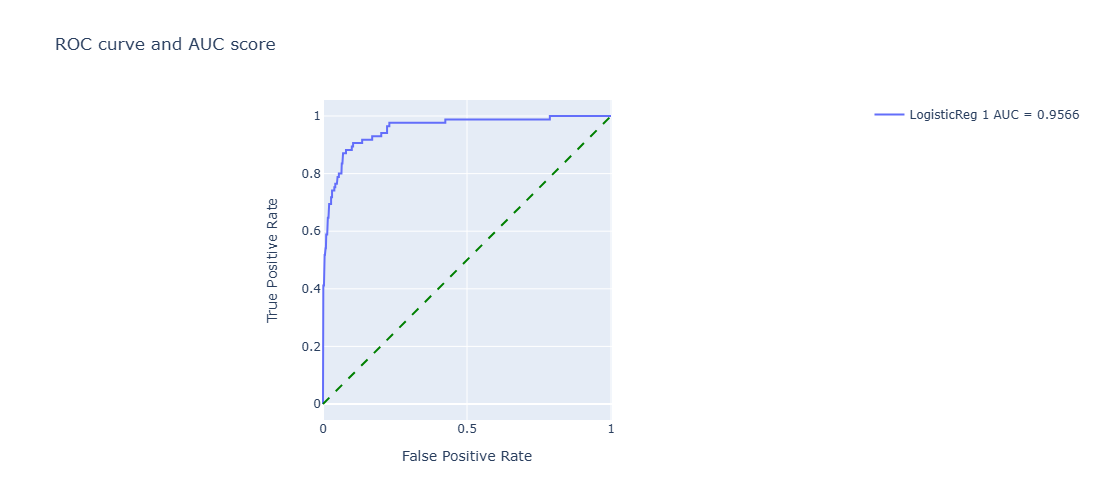

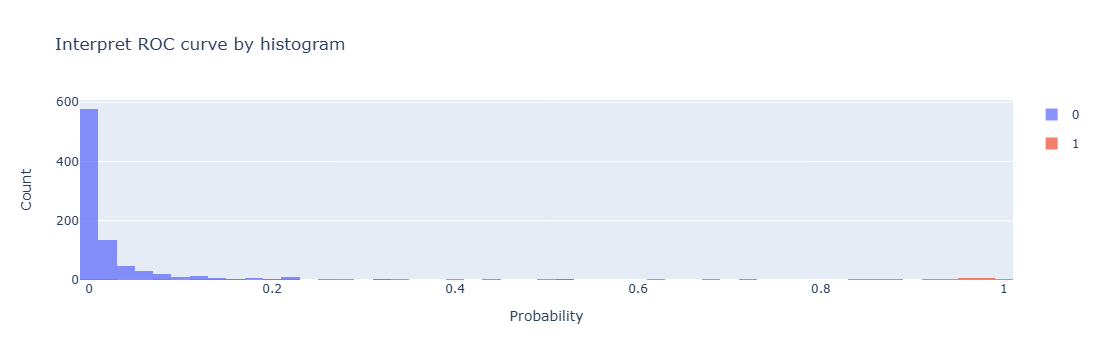

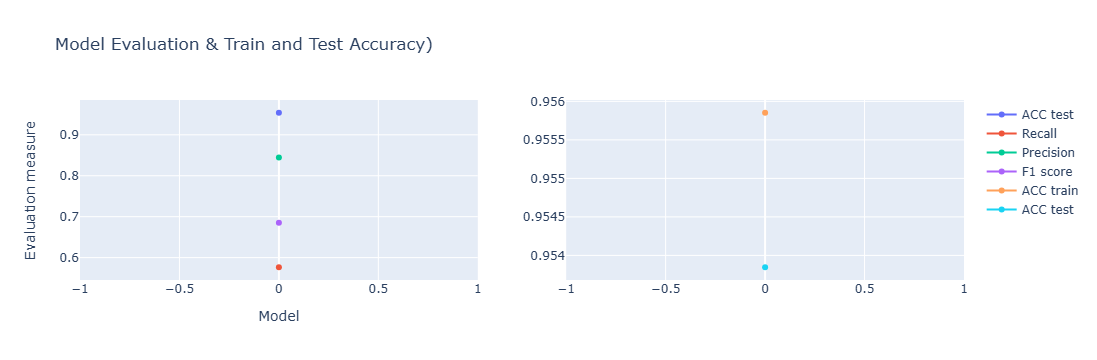

-------------------- Confusion Matrix --------------------
[[881   9]
 [ 36  49]]


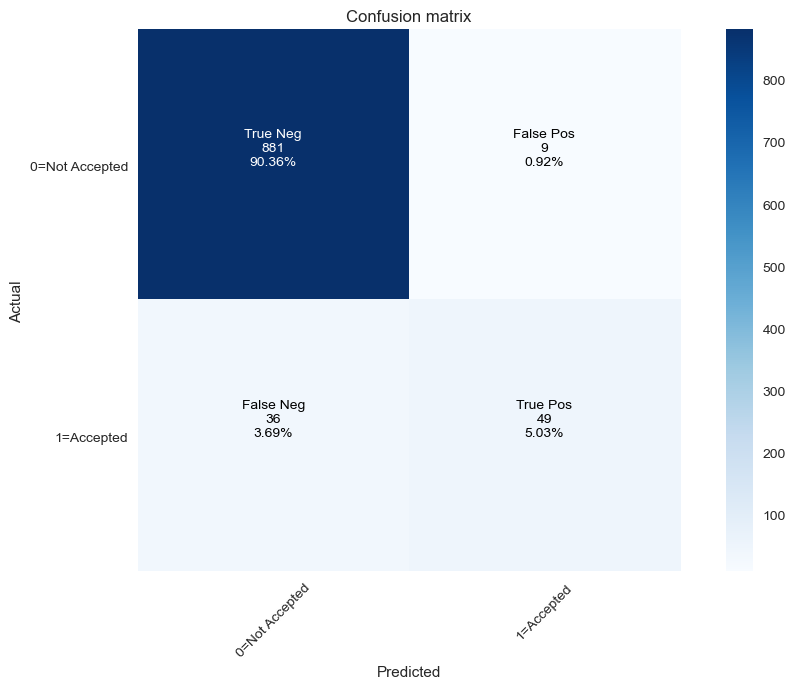

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       890
           1       0.84      0.58      0.69        85

    accuracy                           0.95       975
   macro avg       0.90      0.78      0.83       975
weighted avg       0.95      0.95      0.95       975
 

Jaccard Score: 0.5212765957446809
Log loss: 1.6635532333438687 



In [133]:
# Logistic Regression
# create initial model with LogisticRegression and test_size=0.2
logreg = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(solver='newton-cg'))])
acc_test_5_1, acc_train_5_1, rec_test_5_1, rec_train_5_1 = modeling(
    clf=logreg,
    x=X,
    y=y,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='LogisticReg 1',
    stratify=True)

In [134]:
print(f"Model before tuning:")
print(f"Accuracy train: {acc_train_5_1}")
print(f"Recall train: {rec_train_5_1}")
print(f"Accuracy test: {acc_test_5_1}")
print(f"Recall test: {rec_test_5_1}")

Model before tuning:
Accuracy train: 0.9558521560574949
Recall train: 0.6242603550295858
Accuracy test: 0.9538461538461539
Recall test: 0.5764705882352941


In [135]:
# try to imporve model by changing test_size
pipe5_1 = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression())])
change_test_size(pipe5_1, X, y, 'LogisticReg')

In [136]:
# Define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none', 'l2', 'l1']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Define grid search
grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall', error_score=0)

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Standardize the data
scaler = StandardScaler().fit(x_train)
x_norm_train = scaler.transform(x_train)
x_norm_test = scaler.transform(x_test)

# Fit the model
grid_result = grid_search.fit(x_norm_train, y_train.ravel())

# Print the best parameters and score
print(f"Best score: {grid_result.best_score_} using {grid_result.best_params_}")


Best score: 0.6271836007130125 using {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


-------------------- Shape --------------------
x_train: (3896, 11)
y_train: (3896, 1)
x_test: (975, 11)
y_test: (975, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 890/975 (91.3%)
> Class=1 : 85/975 (8.7%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3558/3896 (91.3%)
> Class=1 : 338/3896 (8.7%)


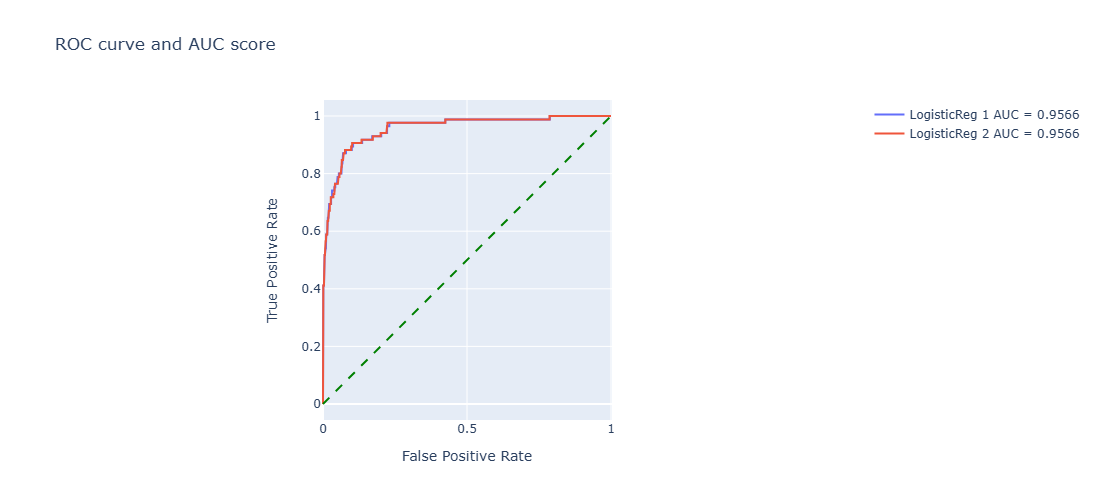

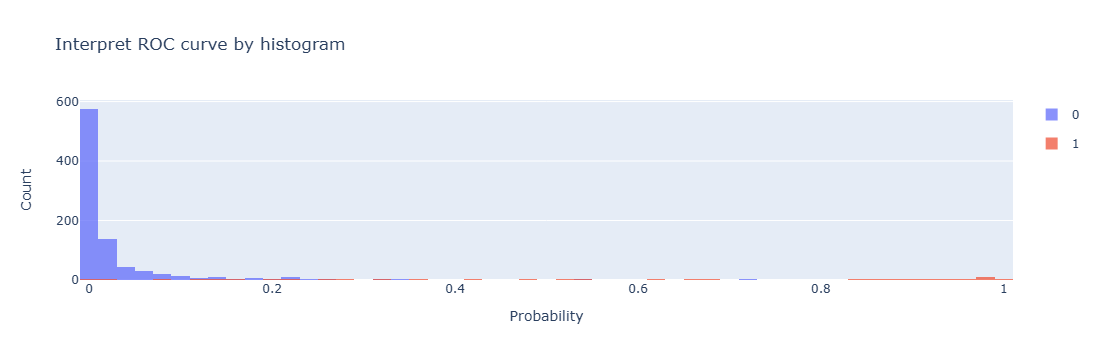

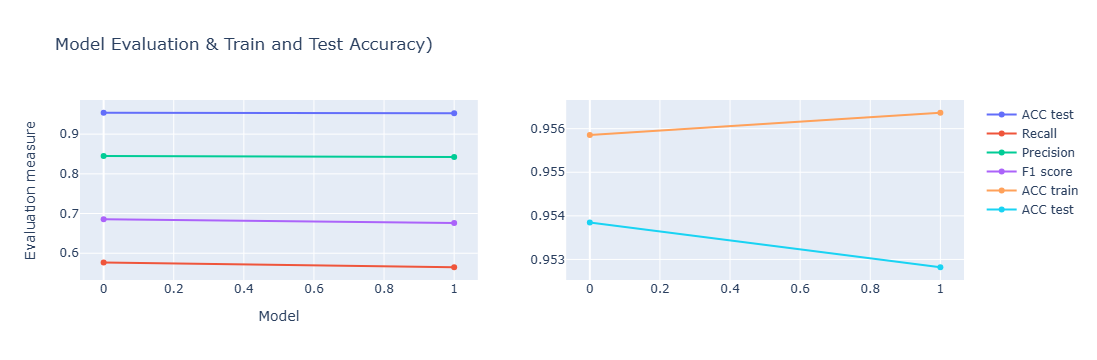

-------------------- Confusion Matrix --------------------
[[881   9]
 [ 37  48]]


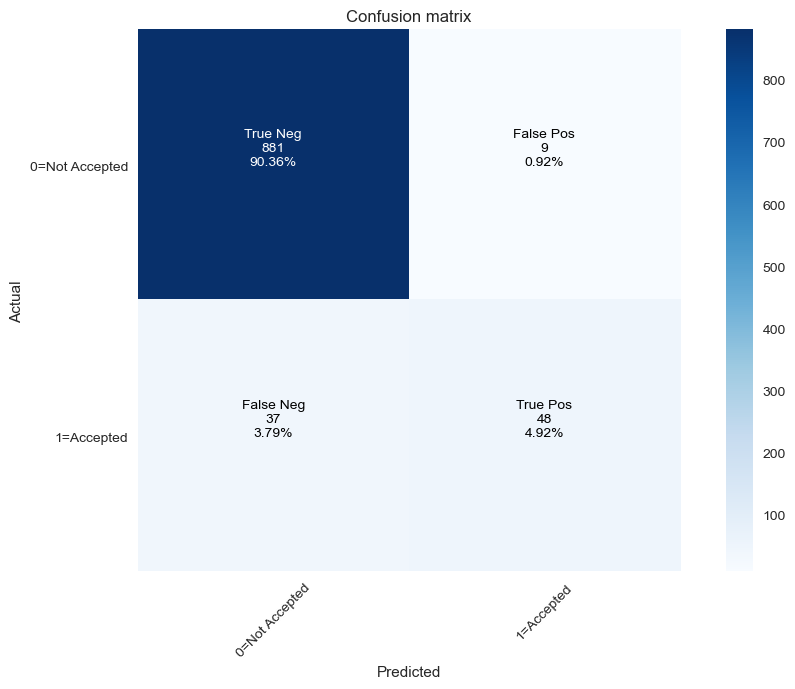

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       890
           1       0.84      0.56      0.68        85

    accuracy                           0.95       975
   macro avg       0.90      0.78      0.83       975
weighted avg       0.95      0.95      0.95       975
 

Jaccard Score: 0.5106382978723404
Log loss: 1.7005210829737325 



In [137]:
# create better LogisticRegression model
# Tune the model
logreg2 = LogisticRegression(solver='liblinear', penalty='l1', C=1, n_jobs=-1)
pipe5_2 = Pipeline([('scaler', StandardScaler()), ('clf', logreg2)])
acc_test_5_2, acc_train_5_2, rec_test_5_2, rec_train_5_2 = modeling(
    clf=pipe5_2,
    x=X,
    y=y,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='LogisticReg 2',
    stratify=True)

In [138]:
print(f"Model after tuning:")
print(f"Accuracy train: {acc_train_5_2}")
print(f"Recall train: {rec_train_5_2}")
print(f"Accuracy test: {acc_test_5_2}")
print(f"Recall test: {rec_test_5_2}")

Model after tuning:
Accuracy train: 0.9563655030800822
Recall train: 0.6301775147928994
Accuracy test: 0.9528205128205128
Recall test: 0.5647058823529412


In [156]:
# create a Dataframe for store accuracy and recall of best model for each algorithm
best_model_test = pd.DataFrame({'Model':[], 'test_size':[], 'Test_Accuracy':[], 'Test_Recall':[]})
best_model_train = pd.DataFrame({'Model':[], 'test_size':[], 'Train_Accuracy':[], 'Train_Recall':[]})

# add best model and its accuracy and recall
# Test_size with 0.4 has the best accuracy
best_model_test.loc[len(best_model_test.index)] = [f"LogisticReg", '0.2', acc_test_5_2, rec_test_5_2]
best_model_train.loc[len(best_model_train.index)] = [f"LogisticReg", '0.2', acc_train_5_2, rec_train_5_2]

-------------------- Shape --------------------
x_train: (3896, 11)
y_train: (3896, 1)
x_test: (975, 11)
y_test: (975, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 890/975 (91.3%)
> Class=1 : 85/975 (8.7%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3558/3896 (91.3%)
> Class=1 : 338/3896 (8.7%)


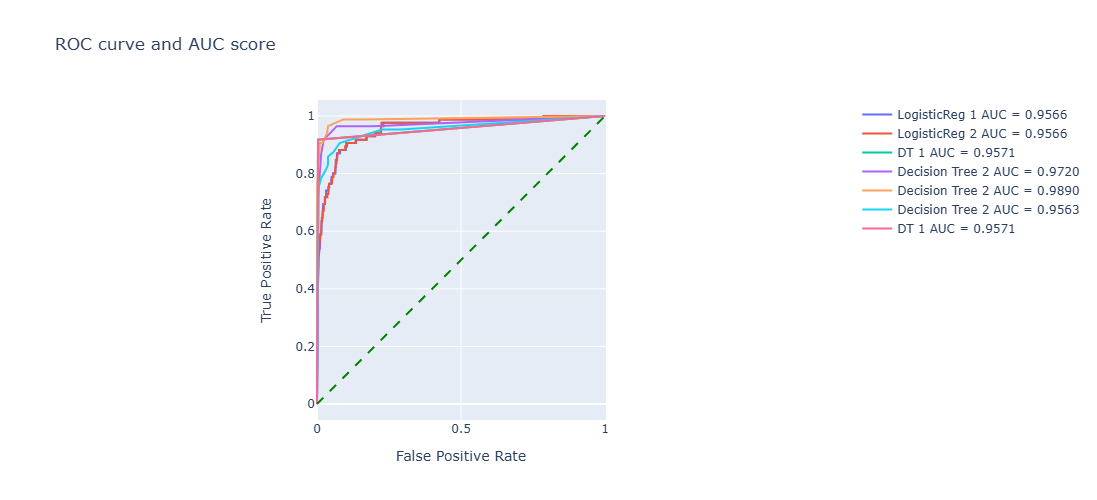

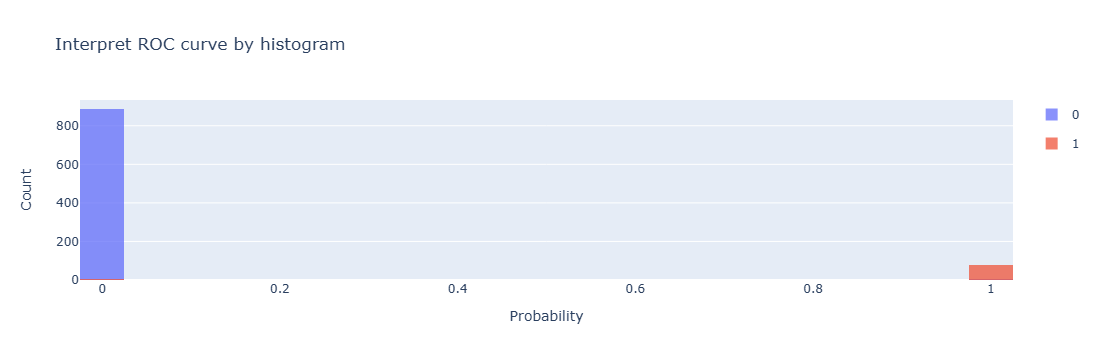

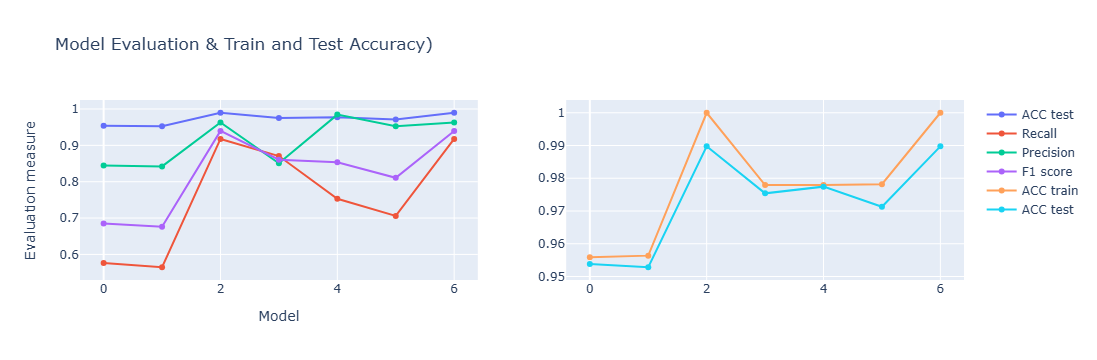

-------------------- Confusion Matrix --------------------
[[887   3]
 [  7  78]]


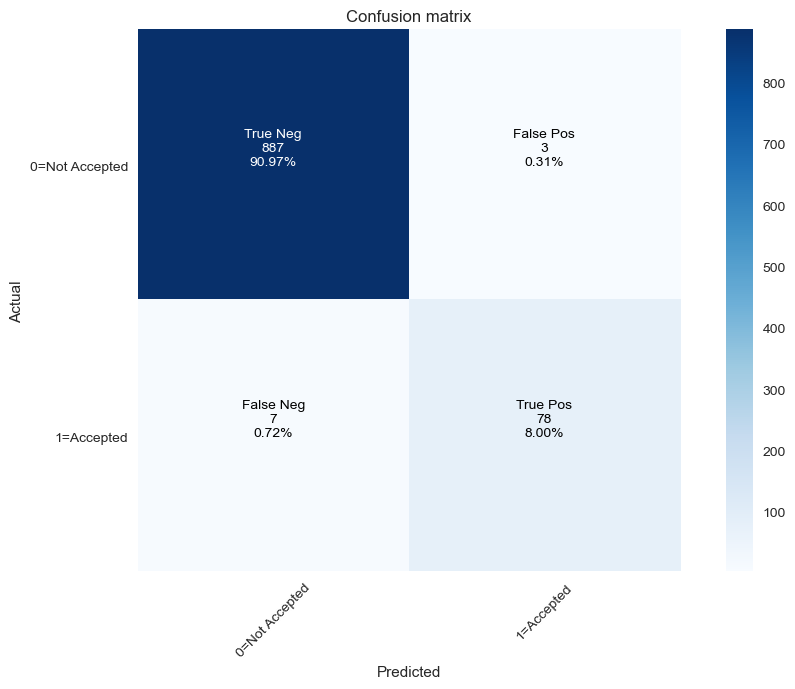

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       890
           1       0.96      0.92      0.94        85

    accuracy                           0.99       975
   macro avg       0.98      0.96      0.97       975
weighted avg       0.99      0.99      0.99       975
 

Jaccard Score: 0.8863636363636364
Log loss: 0.3696784962986377 



In [157]:
# Decision Tree
# create initial DTs model
dts = DecisionTreeClassifier(random_state=0)
pipe7_1 = Pipeline([('scaler', StandardScaler()), ('clf', dts)])
acc_test_7_1, acc_train_7_1, rec_test_7_1, rec_train_7_1 = modeling(
    clf=pipe7_1,
    x=X,
    y=y,
    test_size=0.2,
    classes={'Not Accepted':0, 'Accepted':1},
    model_name='DT 1',
    stratify=True)

In [158]:
print(f"Model before tuning:")
print(f"Train Accuracy: {acc_train_7_1}")
print(f"Test Accuracy: {acc_test_7_1}")
print(f"Train Recall: {rec_train_7_1}")
print(f"Test Recall: {rec_test_7_1}")

Model before tuning:
Train Accuracy: 1.0
Test Accuracy: 0.9897435897435898
Train Recall: 1.0
Test Recall: 0.9176470588235294


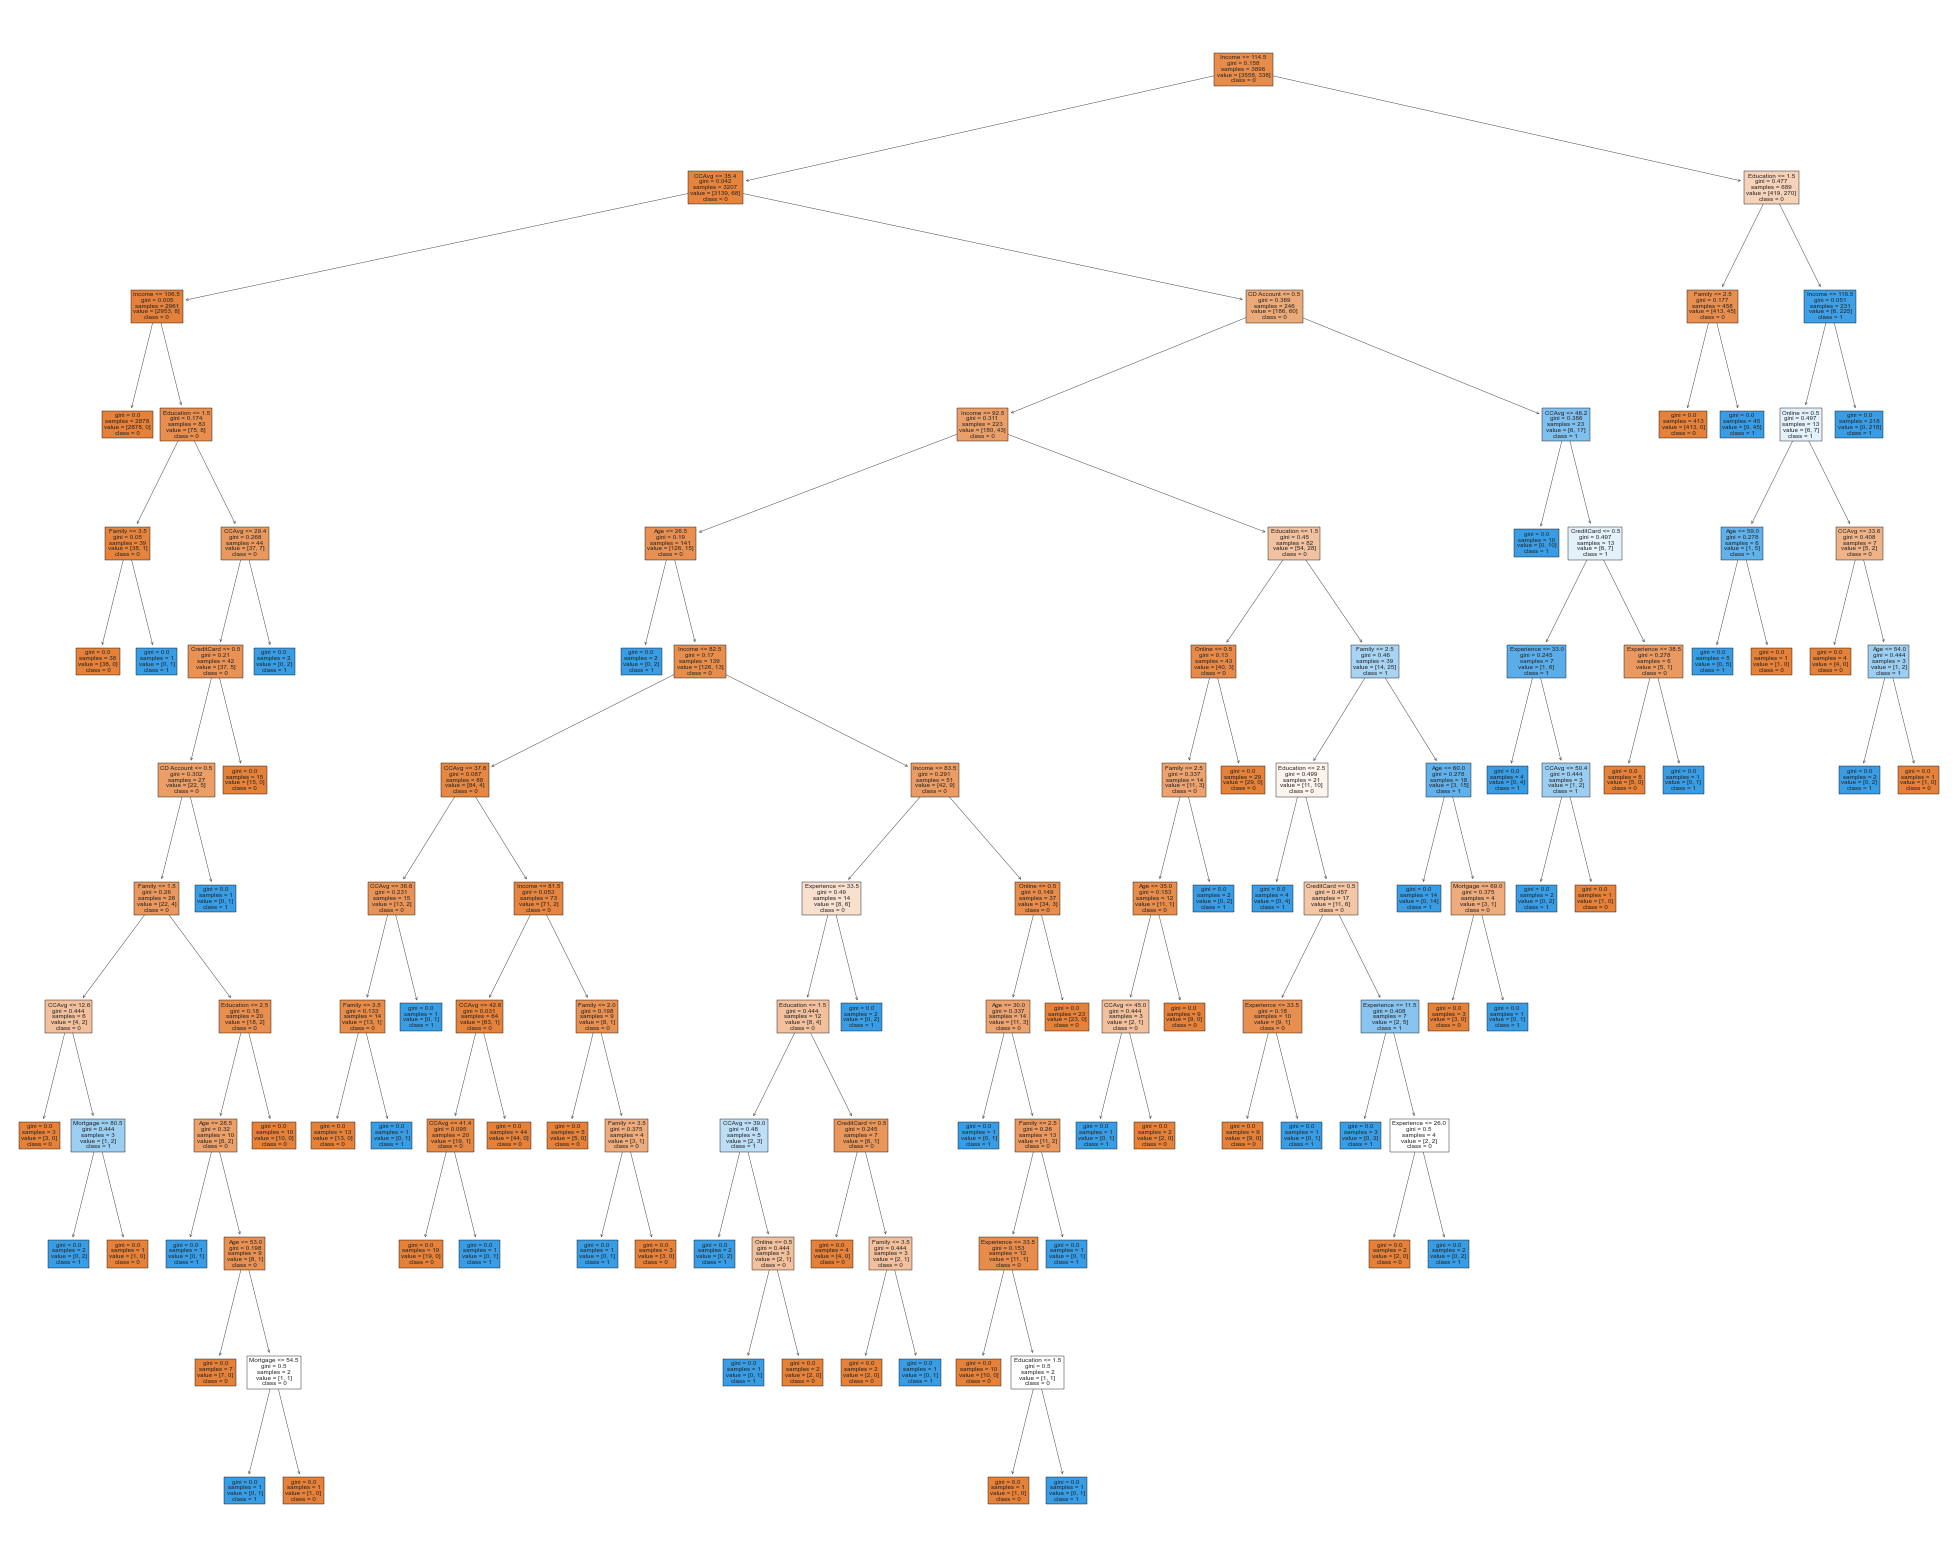

In [159]:
# visualizing tree
from sklearn import tree
feature_names = X.columns
target_names = ['0', '1']
fig = plt.figure(figsize=(25,20))
dt1 = DecisionTreeClassifier(random_state=0)
dt1.fit(x_train,y_train.ravel())
plot = tree.plot_tree(
    dt1,
    feature_names = feature_names,
    class_names = target_names,
    filled=True)
plt.show()

In [160]:
# According to the obtained result, the model is overfitting and our tree has many rules. This is a common problem in decision trees. 
# To solve this problem, tune the model

# Grid of parameters to choose from
grid_param={"criterion":["gini","entropy"],
             "max_depth":range(2,10,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }
cv = StratifiedKFold(n_splits=10)
grid_search=GridSearchCV(estimator=dt1,param_grid=grid_param,cv=cv,n_jobs=-1)
grid_search.fit(x_train,y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 20)})

In [161]:
# Print the best parameters
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 8}


-------------------- Shape --------------------
x_train: (3896, 11)
y_train: (3896, 1)
x_test: (975, 11)
y_test: (975, 1)
--------------- Class Distribution in y_test ---------------
> Class=0 : 890/975 (91.3%)
> Class=1 : 85/975 (8.7%)
--------------- Class Distribution in y_train ---------------
> Class=0 : 3558/3896 (91.3%)
> Class=1 : 338/3896 (8.7%)


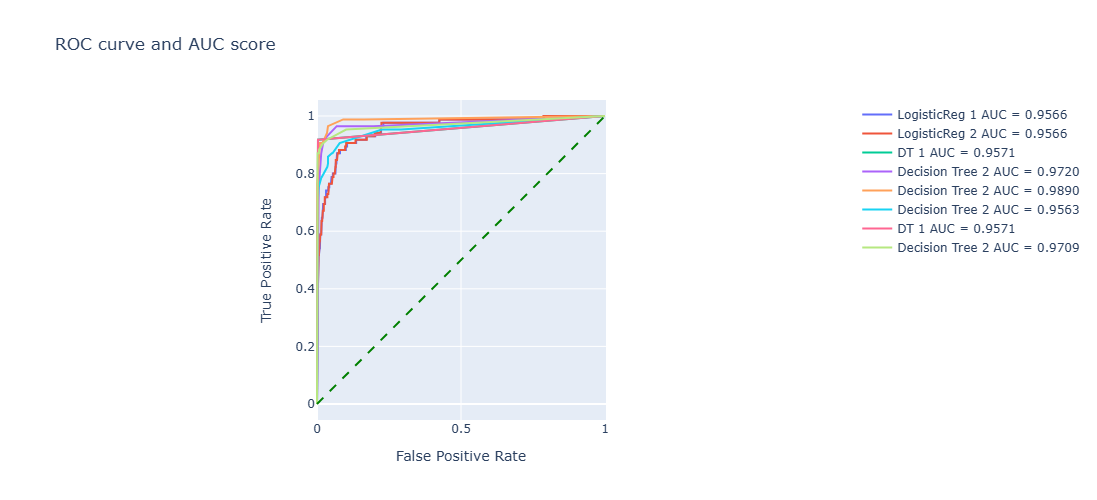

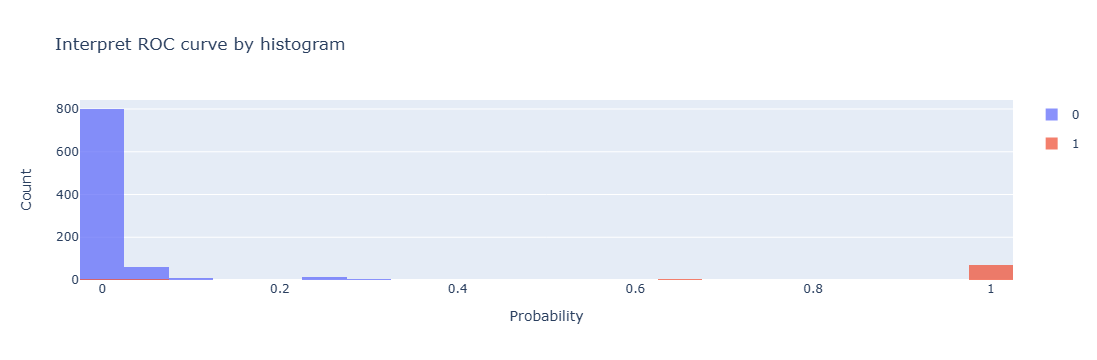

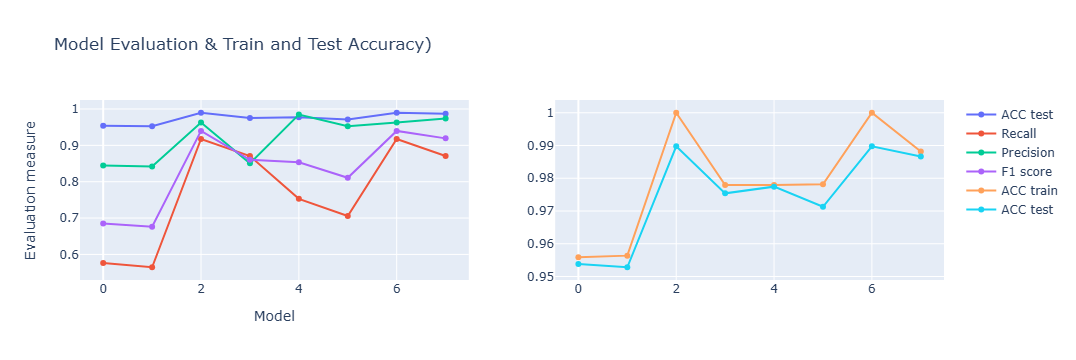

-------------------- Confusion Matrix --------------------
[[888   2]
 [ 11  74]]


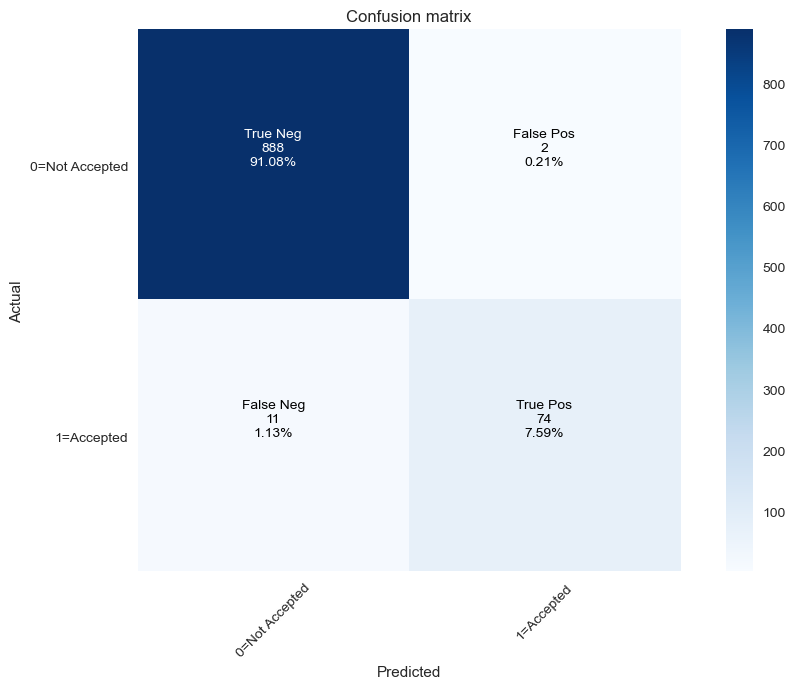

-------------------- Classification Report --------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       890
           1       0.97      0.87      0.92        85

    accuracy                           0.99       975
   macro avg       0.98      0.93      0.96       975
weighted avg       0.99      0.99      0.99       975
 

Jaccard Score: 0.8505747126436781
Log loss: 0.4805820451882289 



In [162]:
# Create the decision tree with best parameter
dt2=DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=1,
    min_samples_split=8,
    splitter='random'
    )
dt2.fit(x_train,y_train.ravel())
plt.figure(figsize=(20,12), dpi=1000)
plot = tree.plot_tree(
    dt2,
    feature_names = feature_names,
    class_names = target_names,
    filled=True)
plt.show()

acc_test_dt, acc_train_dt, rec_test_dt, rec_train_dt = modeling(
    clf=dt2,
    x=X,
    y=y,
    test_size=0.2,
    classes={'Not Accepted': 0, 'Accepted': 1},
    model_name='Decision Tree 2',
    stratify=True
)

In [163]:
print(f"Model after tuning:")
print(f"Accuracy train: {acc_train_dt}")
print(f"Recall train: {rec_train_dt}")
print(f"Accuracy test: {acc_test_dt}")
print(f"Recall test: {rec_test_dt}")

Model after tuning:
Accuracy train: 0.9881930184804928
Recall train: 0.9023668639053254
Accuracy test: 0.9866666666666667
Recall test: 0.8705882352941177


In [164]:
# add best model and its accuracy and recall
best_model_test.loc[len(best_model_test.index)] = [f"Decision Tree", '0.2', acc_test_dt, rec_test_dt]
best_model_train.loc[len(best_model_train.index)] = [f"Decision Tree", '0.2', acc_train_dt, rec_train_dt]

In [165]:
# tabel of best models by Test_Accuracy
best_model_test.sort_values(by=['Test_Recall'], ascending=False).reset_index(drop=True).style.background_gradient(cmap='summer_r')

In [166]:
# Make prediction for first 10 rows using the best model found
# Select the first 10 rows (including all columns)
df_first_10 = df.iloc[:10].copy()

# Get the actual values of 'Personal Loan'
df_first_10['Actual Personal Loan'] = df_first_10['Personal Loan']

# Make predictions using the trained model
# Only select the feature columns (i.e., excluding 'Personal Loan' and the new 'Actual Personal Loan')
features = df_first_10.drop(columns=['Personal Loan', 'Actual Personal Loan'])

# Predict the loan acceptance status
predictions = dt2.predict(features)

# Add the predicted values to the DataFrame
df_first_10['Predicted Personal Loan'] = predictions

# Display the first 10 rows of the table with actual and predicted values
df_first_10.head(10)


Age  Experience  Income Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49      4   19.2          1         0              0   
1   45          19      34      3   18.0          1         0              0   
2   39          15      11      1   12.0          1         0              0   
3   35           9     100      1   32.4          2         0              0   
4   35           8      45      4   12.0          2         0              0   
5   37          13      29      4    4.8          2       155              0   
6   53          27      72      2   18.0          2         0              0   
7   50          24      22      1    3.6          3         0              0   
8   35          10      81      3    7.2          2       104              0   
9   34           9     180      1  106.8          3         0              1   

  Securities Account CD Account Online CreditCard  Actual Personal Loan  \
0                  1          0      0          0                     0   
1                  1          0      0          0                     0   
2                  0          0      0          0                     0   
3                  0          0      0          0                     0   
4                  0          0      0          1                     0   
5                  0          0      1          0                     0   
6                  0          0      1          0                     0   
7                  0          0      0          1                     0   
8                  0          0      1          0                     0   
9                  0          0      0          0                     1   

   Predicted Personal Loan  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
5                        0  
6                        0  
7                        0  
8                        0  
9                        1